In [1]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import os 
from pathlib import Path
import re
import PIL
import cv2
import seaborn as sns 
import copy
import importlib

import spectral_util
importlib.reload(spectral_util)
from spectral_util import *

import fluorescence_util
importlib.reload(fluorescence_util)
from fluorescence_util import *


In [2]:
# 'board.xlsx'
# 'board_noFlux.xlsx'
# 'flux_20240925_184835.xlsx'
# 'flux-onBoard.xlsx'
# 'lead_noFlux.xlsx'

# srcbase = Path("./data/EEM_F-7000_2025-04-11/")
print(Path.cwd())
srcbase = Path("./data/EEM_F-7000_2025-05-29/")
dstdir = Path("./dst/eem/filter")

srcdata = [
    {
        "path": fpath,
        "sample": fpath.stem.split("_")[0],  # 'ABS_20250411' → 'ABS'
        "label": None
    }
    for fpath in srcbase.glob("*.xlsx")
]
srcdata

c:\Users\sawamoto24\sawamoto24\修士研究\microplastic


[{'path': WindowsPath('data/EEM_F-7000_2025-05-29/ABS.xlsx'),
  'sample': 'ABS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/HDPE.xlsx'),
  'sample': 'HDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/LDPE.xlsx'),
  'sample': 'LDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PC.xlsx'),
  'sample': 'PC',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PET_20250529_150210.xlsx'),
  'sample': 'PET',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PMMA.xlsx'),
  'sample': 'PMMA',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PP.xlsx'),
  'sample': 'PP',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PS.xlsx'),
  'sample': 'PS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PVC.xlsx'),
  'sample': 'PVC',
  'label': None}]

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].


<Figure size 640x480 with 0 Axes>

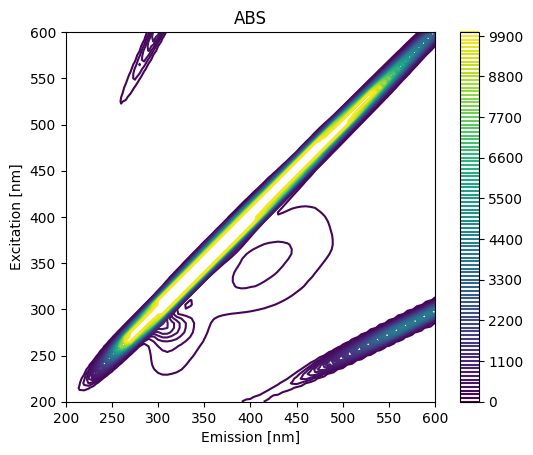

<Figure size 640x480 with 0 Axes>

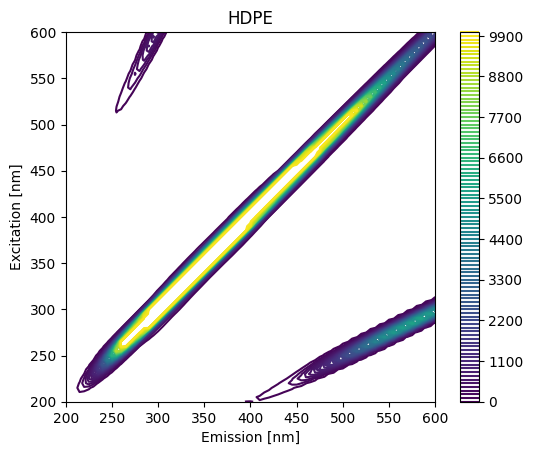

<Figure size 640x480 with 0 Axes>

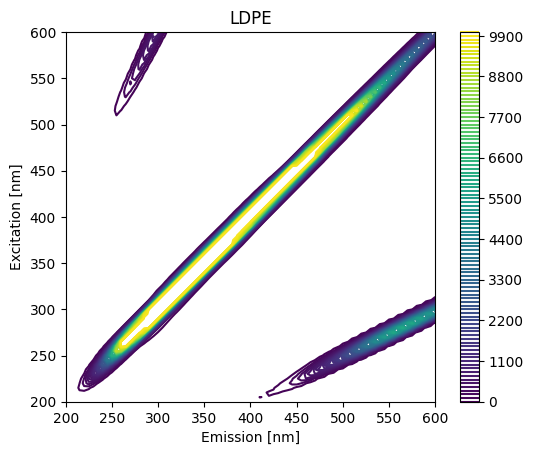

<Figure size 640x480 with 0 Axes>

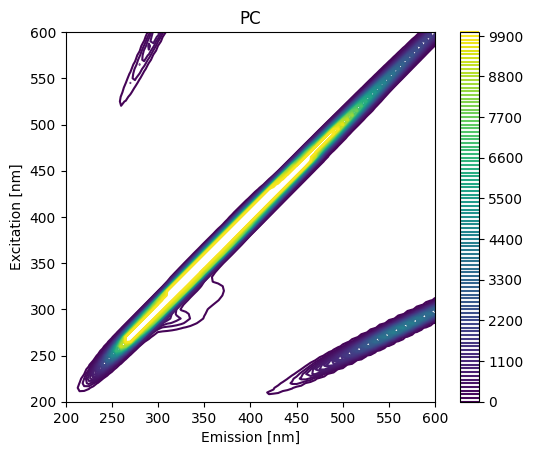

<Figure size 640x480 with 0 Axes>

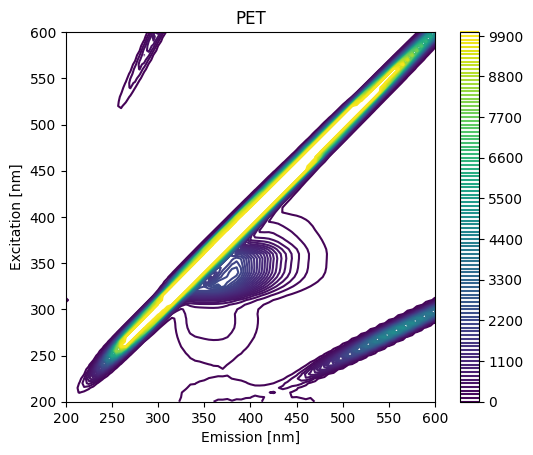

<Figure size 640x480 with 0 Axes>

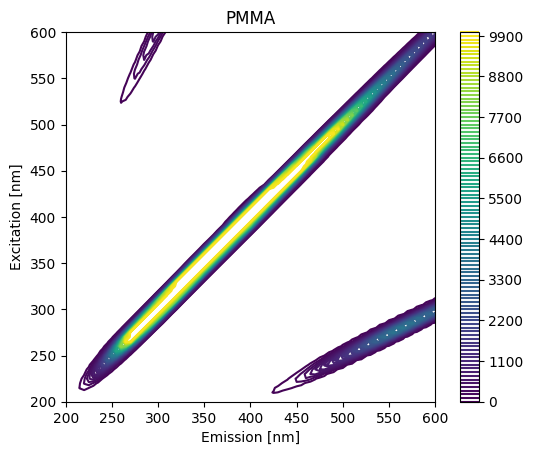

<Figure size 640x480 with 0 Axes>

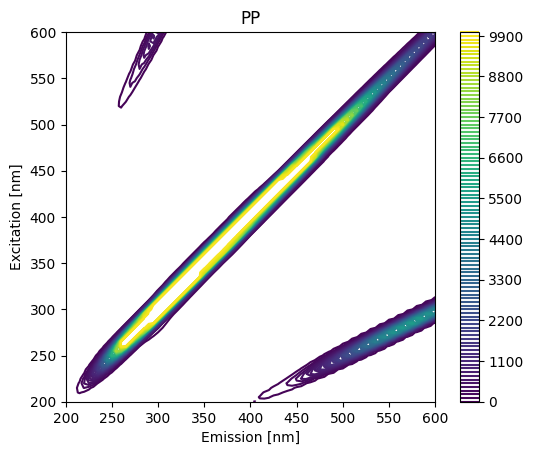

<Figure size 640x480 with 0 Axes>

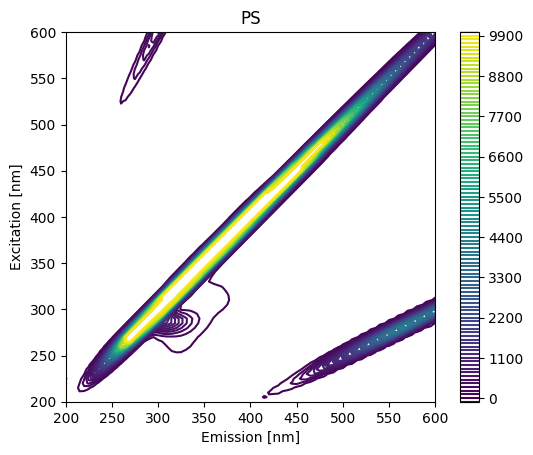

<Figure size 640x480 with 0 Axes>

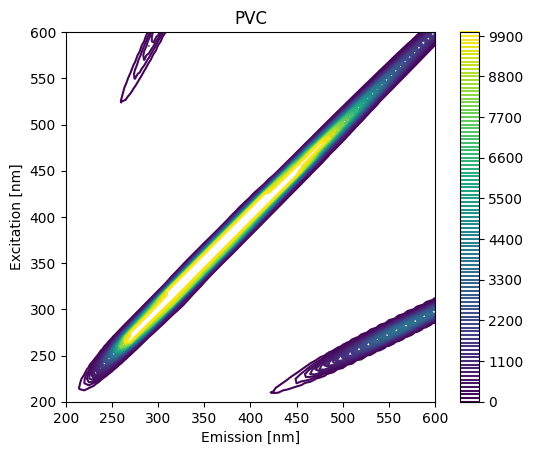

In [3]:
for data in srcdata:
    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()
    eem.plot_contour(level=100, show_sample_name=True)

In [4]:
em_bands = eem.em_bands
ex_bands = eem.ex_bands

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
(9, 71, 71)


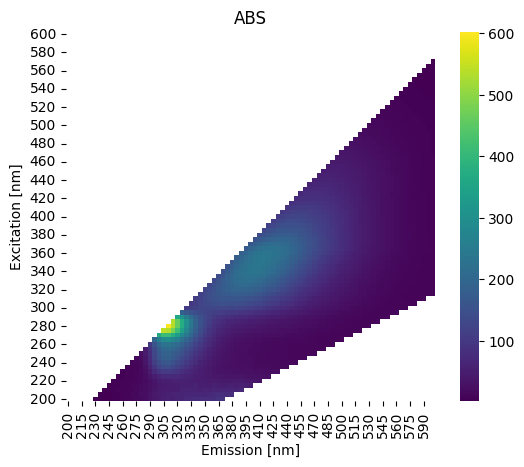

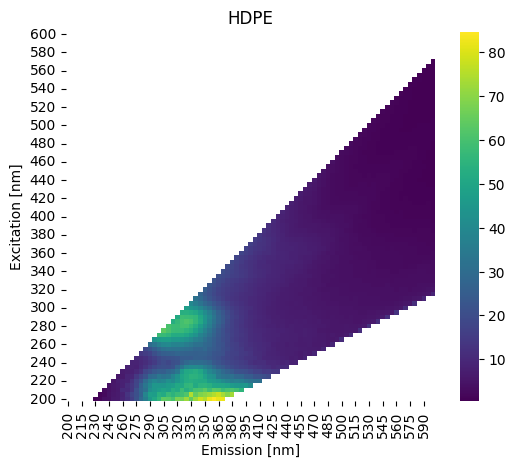

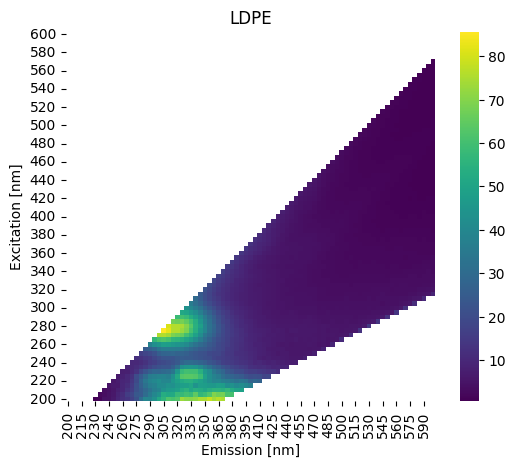

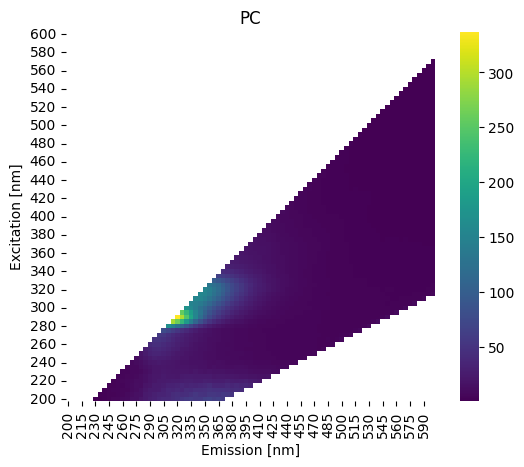

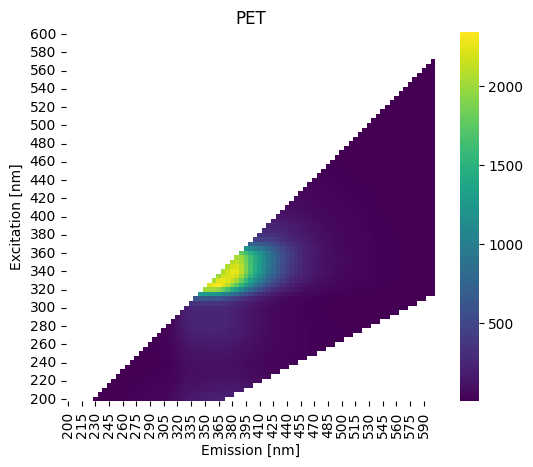

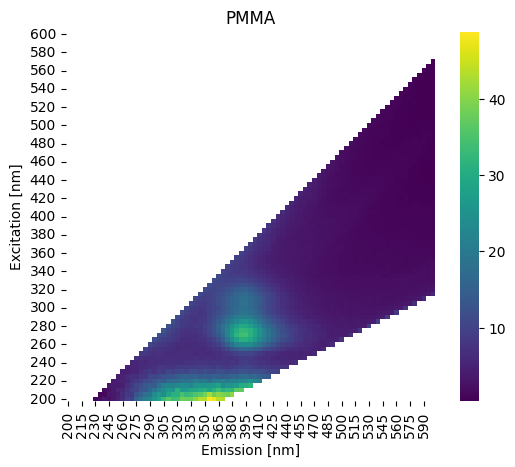

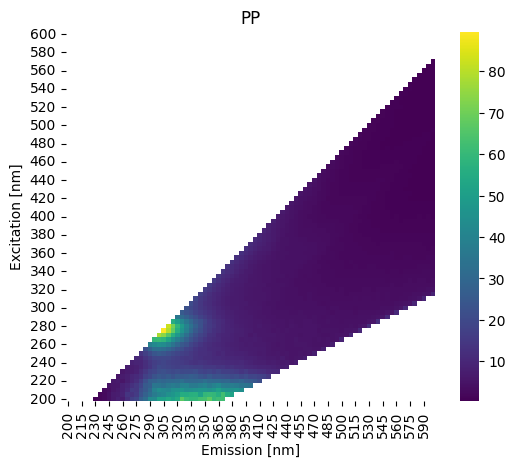

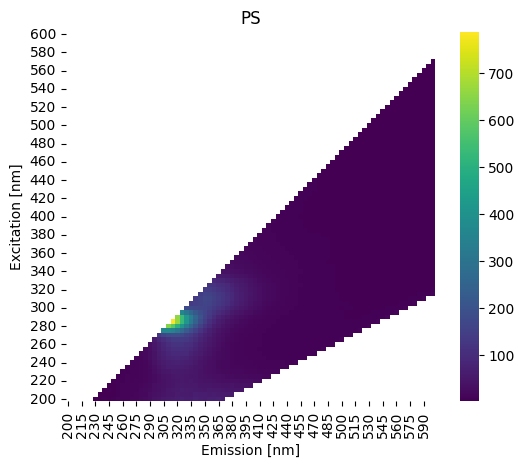

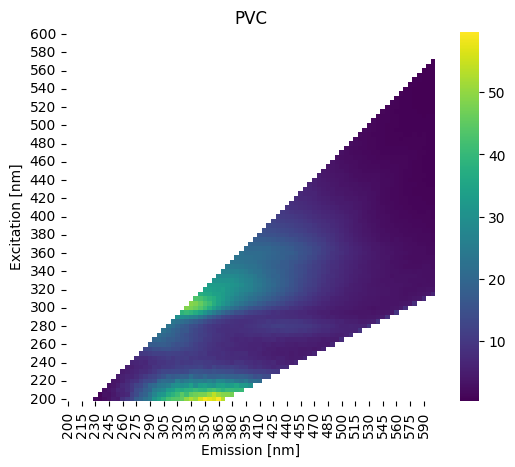

In [5]:
# for data in srcdata:
#     eem = fluorescence_util.EEMF7000(data.get('path'))
#     print(eem)

#     plt.figure()

#     # ① 散乱ピーク除去
#     eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
#                                                        remove_first_order=True, 
#                                                        inplace=True)

#     # ② 追加で散乱領域全体を除去
#     eem.remove_scatter_regions(inplace=True)

#     eem.plot_heatmap()
#     plt.title(eem.sample)

sample_data = []
sample_name = []

for data in srcdata:

    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()

    # ①散乱ピーク除去
    eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
                                                       remove_first_order=True,
                                                        inplace=True)

    # ② 追加で散乱領域全体を除去
    eem.remove_scatter_regions(inplace=True)

    
    # 250nm以上のインデックスを取得
    ex_mask = ex_bands >= 250
    em_mask = em_bands >= 250

    eem.plot_heatmap()
    plt.title(eem.sample)


    eem_matrix = eem.mat  # numpy配列を取り出す

    eem_matrix = np.nan_to_num(eem.mat, nan=0.0)
    eem_matrix_trimmed = eem_matrix[np.ix_(ex_mask, em_mask)]

    sample_data.append(eem_matrix_trimmed)
    sample_name.append(eem.sample)


# numpy配列に保存
eem_array = np.array(sample_data)
print(eem_array.shape)

## 波長域の調整

In [6]:
ex_mask = np.array(ex_bands) >= 250
em_mask = np.array(em_bands) >= 250

# trim
ex_bands = np.array(ex_bands)[ex_mask]
em_bands = np.array(em_bands)[em_mask]

print("Excitation bands ≥ 250nm:", ex_bands)
print("Emission bands ≥ 250nm:", em_bands)

print(ex_bands.shape)

Excitation bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]
Emission bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]
(71,)


## ノイズありサンプルの生成

### 各MPごとに生成

In [7]:
def augment_eem_per_mp_with_scatter_removal(eem_array, ex_bands, em_bands, n_variants=20, noise_level=0.05, seed=None):
    """
    ノイズ付きEEMを生成し、散乱領域を0にして除去する。

    Parameters:
        eem_array: np.ndarray
            入力EEM配列。shape = (num_MP, n_ex, n_em)
        ex_bands: np.ndarray
            励起波長リスト（shape = n_ex）
        em_bands: np.ndarray
            蛍光波長リスト（shape = n_em）
        n_variants: int
            各MPごとに生成するノイズ付きEEMの数
        noise_level: float
            ノイズのスケール（最大値に対する割合）
        seed: int or None
            乱数シード

    Returns:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
    """
    if seed is not None:
        np.random.seed(seed)

    num_MP, n_ex, n_em = eem_array.shape
    augmented_eems = np.zeros((num_MP, n_variants, n_ex, n_em))

    # 散乱領域マスク（True: 有効領域, False: 散乱 → 0にする）
    ex_grid, em_grid = np.meshgrid(ex_bands, em_bands, indexing='ij')
    valid_mask = (em_grid >= ex_grid) & (em_grid <= 2 * ex_grid)

    for i in range(num_MP):
        base_eem = eem_array[i]
        for j in range(n_variants):
            noise = np.random.normal(loc=0, scale=noise_level * np.max(base_eem), size=base_eem.shape)
            noisy_eem = np.clip(base_eem + noise, 0, None)
            noisy_eem[~valid_mask] = 0  # 散乱領域を0に
            augmented_eems[i, j] = noisy_eem

    return augmented_eems
# ex_bands, em_bands は np.array で定義されていると仮定
augmented_eems = augment_eem_per_mp_with_scatter_removal(
    eem_array,
    ex_bands=ex_bands,
    em_bands=em_bands,
    n_variants=50,
    noise_level=0,
    seed=42
)


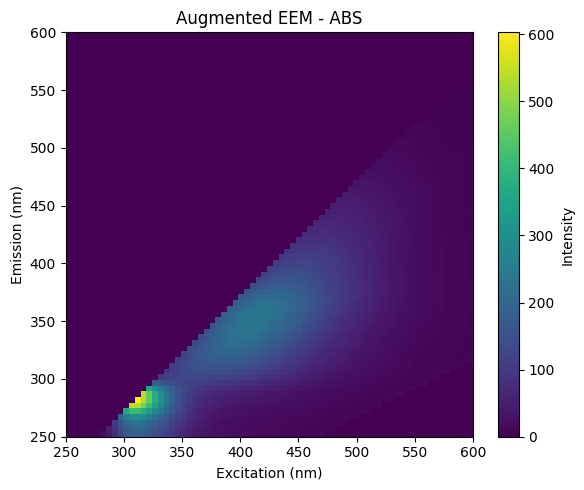

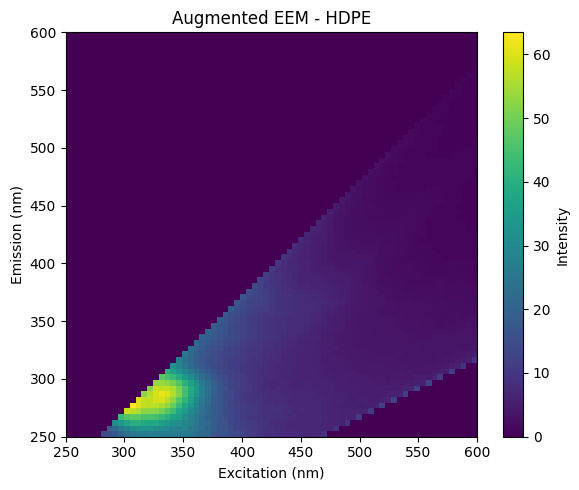

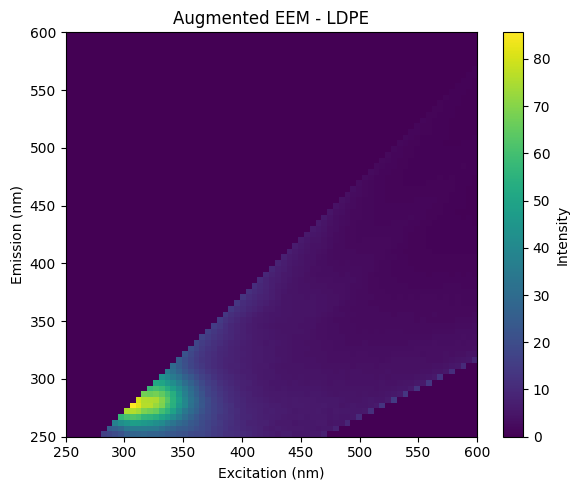

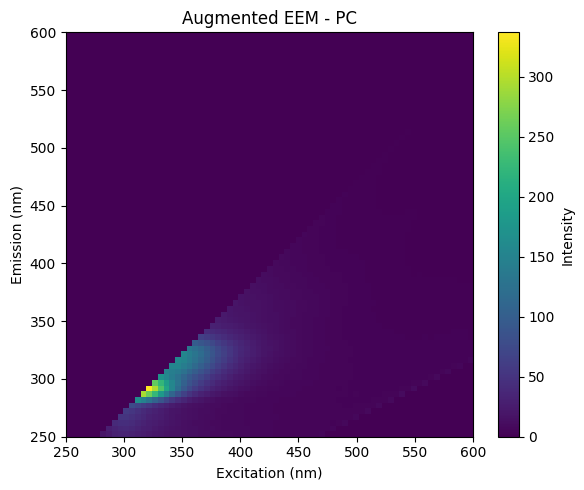

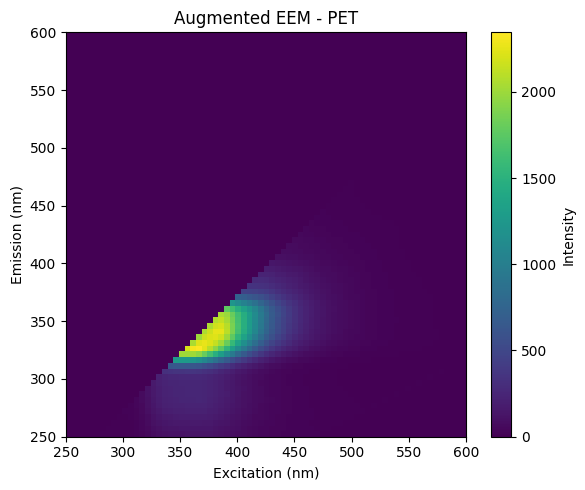

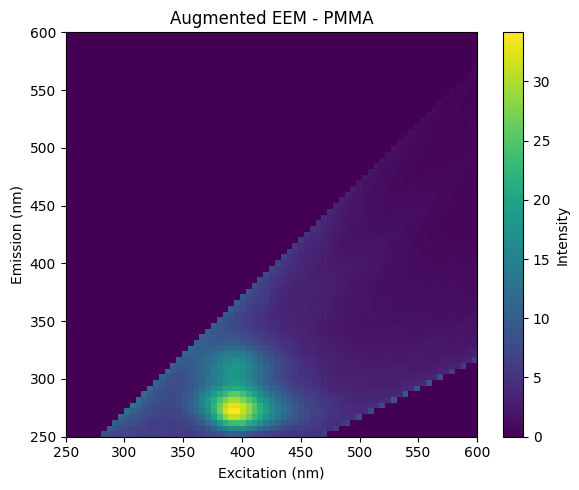

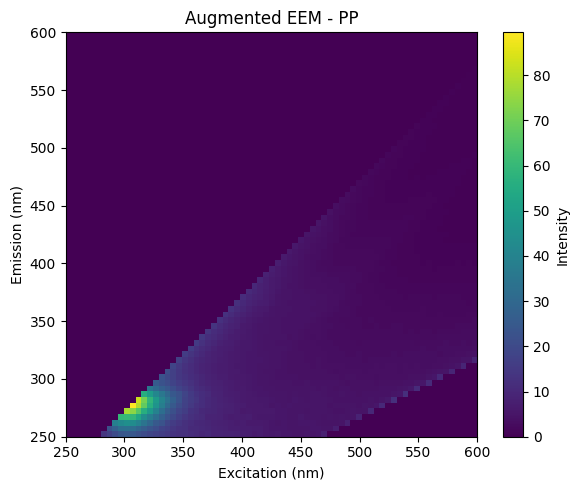

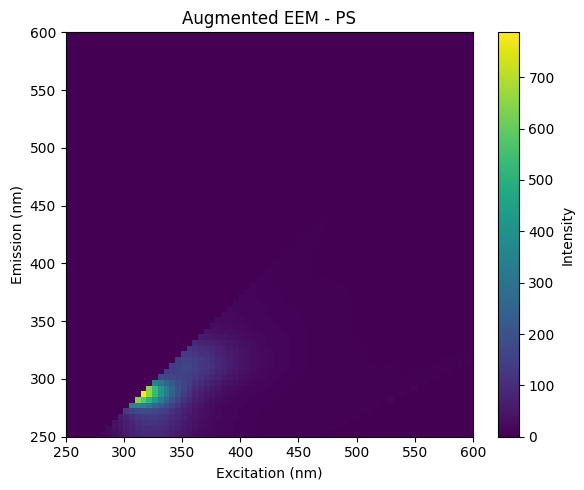

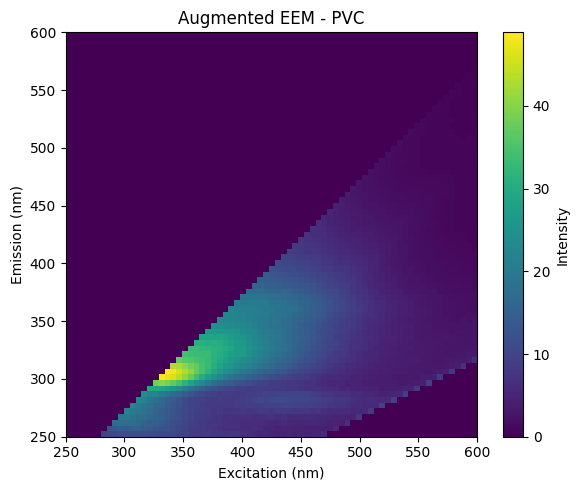

In [8]:
import matplotlib.pyplot as plt

def plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=None):
    """
    各MPから1つずつノイズ付きEEMを、個別にプロット（励起：横軸、放射：縦軸）。

    Parameters:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
        ex_bands: np.ndarray
            励起波長リスト（横軸）
        em_bands: np.ndarray
            発光波長リスト（縦軸）
        sample_names: list or None
            MPごとの名前リスト（任意）
    """
    num_MP = augmented_eems.shape[0]

    for mp_idx in range(num_MP):
        eem = augmented_eems[mp_idx, 0]  # 各MPで最初のノイズバージョンを表示

        plt.figure(figsize=(6, 5))
        plt.imshow(eem, origin='lower',
                   extent=[ex_bands[0], ex_bands[-1], em_bands[0], em_bands[-1]],
                   aspect='auto', cmap='viridis')

        plt.xlabel('Excitation (nm)')
        plt.ylabel('Emission (nm)')
        title = sample_names[mp_idx] if sample_names else f'MP {mp_idx}'
        plt.title(f'Augmented EEM - {title}')
        plt.colorbar(label='Intensity')
        plt.tight_layout()
        plt.show()

plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=sample_name)
# plot_augmented_eems_one_by_one(combined_augmented_eems, ex_bands, em_bands, sample_names=sample_name)


---

# 分類器

In [9]:
# debug
npz_path="augmented_eems.npz"
data = np.load(npz_path)
sample_names = data.files

print(data)
print(sample_names)
print(data["PET"].shape)

NpzFile 'augmented_eems.npz' with keys: ABS, HDPE, LDPE, PC, PET...
['ABS', 'HDPE', 'LDPE', 'PC', 'PET', 'PMMA', 'PP', 'PS', 'PVC']
(50, 71, 71)


In [10]:
X = []
y = []

for sample_name in sample_names:
    eems = data[sample_name]  # shape: (n_variants, 71, 71)

    for eem in eems:
        eem = np.nan_to_num(eem)  # NaN除去

        # flattenして1次元ベクトルにする
        feature_vector = eem.flatten()  # shape: (71*71,) = (5041,)

        X.append(feature_vector)
        y.append(sample_name)

X = np.array(X)  # shape: (3600, 5041) など
y = np.array(y)

X.shape

(450, 5041)

## SVM

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def train_and_evaluate_svm(X, y, test_size=0.2, random_state=42, verbose=True):
    """
    SVMによる分類モデルの学習と評価を行う関数。
    
    Parameters:
        X: np.ndarray
            特徴量行列（shape: [n_samples, n_features]）
        y: list or np.ndarray
            ラベル（クラス名）のリストまたは配列
        test_size: float
            テストデータの割合（デフォルト: 0.2 = 20%）
        random_state: int
            再現性のための乱数シード
        verbose: bool
            結果を表示するかどうか

    Returns:
        model: 学習済みのSVCモデル
        report: str
            classification_reportの文字列
        conf_matrix: np.ndarray
            混同行列
        accuracy: float
            正解率（Accuracy）
    """
    # 1. データ分割
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # 2. スケーリング
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. SVMの学習
    model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=random_state)
    model.fit(X_train_scaled, y_train)

    # 4. 評価
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    if verbose:
        print("=== Classification Report ===")
        print(report)
        print("=== Confusion Matrix ===")
        print(conf_matrix)
        print(f"=== Accuracy: {accuracy * 100:.2f}% ===")

    return model, report, conf_matrix, accuracy

model, report, conf_matrix, acc = train_and_evaluate_svm(X, y)



=== Classification Report ===
              precision    recall  f1-score   support

         ABS       1.00      1.00      1.00        10
        HDPE       0.60      0.60      0.60        10
        LDPE       0.64      0.70      0.67        10
          PC       1.00      1.00      1.00        10
         PET       1.00      1.00      1.00        10
        PMMA       1.00      1.00      1.00        10
          PP       1.00      0.90      0.95        10
          PS       1.00      1.00      1.00        10
         PVC       1.00      1.00      1.00        10

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.92      0.91      0.91        90

=== Confusion Matrix ===
[[10  0  0  0  0  0  0  0  0]
 [ 0  6  4  0  0  0  0  0  0]
 [ 0  3  7  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0]
 [ 0  1  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0 10  0]


## PLS-DA

In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
Y = lb.fit_transform(y)  # PLS-DA用の目的変数
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], shape=(450, 9))

In [13]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=2)  # コンポーネント数は目的に応じて調整
pls.fit(X, Y)


PLSRegression()

クラス ABS の点数: 50
クラス HDPE の点数: 50
クラス LDPE の点数: 50
クラス PC の点数: 50
クラス PET の点数: 50
クラス PMMA の点数: 50
クラス PP の点数: 50
クラス PS の点数: 50
クラス PVC の点数: 50


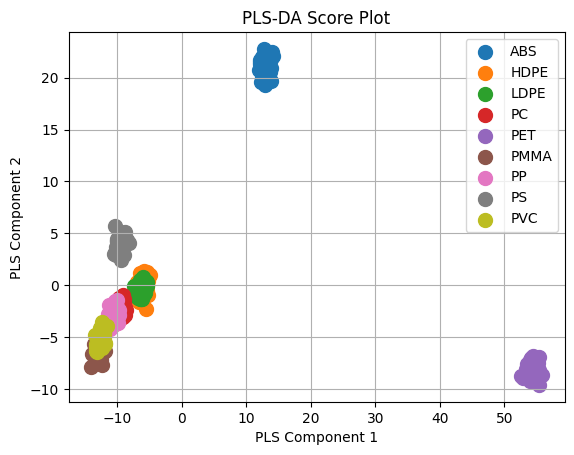

In [14]:
import matplotlib.pyplot as plt
import numpy as np

X_scores = pls.x_scores_

# 念のため y を str 型で統一
y = np.array(y, dtype=str)

for class_label in np.unique(y):
    idx = (y == class_label)
    print(f"クラス {class_label} の点数: {np.sum(idx)}")
    plt.scatter(X_scores[idx, 0], X_scores[idx, 1], label=class_label, s=100)

plt.xlabel("PLS Component 1")
plt.ylabel("PLS Component 2")
plt.title("PLS-DA Score Plot")
plt.legend()
plt.grid(True)
plt.show()
